# Part-1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Function to retrieve Column Headers in List
def Reading_Headers():
    f_col_headers=open('field_names.txt','r')
    col_headers=[]
    for i in f_col_headers.readlines():
        if i:
            i=i.strip("\n")
            col_headers.append(i)
    return col_headers

#### Reading_Headers is a function to retrieve the Column headers from the text file

In [3]:
import numpy
import matplotlib.pyplot as plot
def bootstrap(index,sample_size):
    sample_list=[]
    for i in range(0,sample_size):
        sample=numpy.random.choice(index,size=1)
        sample_list.append(int(sample))
    return sample_list

#### BootStrap function to draw the samples. Here logic is, I am redrawing the index number as the sample_size input.
and returning the sample_list which consists of the index numbers

In [4]:
import pandas as pd

#Collecting Column headers into a List
col_headers=Reading_Headers()


#Reading breast-cancer data and creating dataframe with respective column headers
df=pd.read_csv('breast-cancer.csv',names=col_headers) #dataframe with actual data for any refernce
d=pd.read_csv('breast-cancer.csv',names=col_headers)

#As diagnosis is the label feature of the data set and as given in categorial type we need to change it to numerical type
d.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis]
y=d['diagnosis']

# droping the diagnosis column from the dataframe
#d.drop(['ID'],axis=1,inplace=True)


smooth_mean=d.groupby(['diagnosis'])['smoothness_mean'].mean()
smooth_median=d.groupby(['diagnosis'])['smoothness_mean'].median()
compact_mean=d.groupby(['diagnosis'])['compactness_mean'].mean()
compact_median=d.groupby(['diagnosis'])['compactness_mean'].median()
print('Smooth Mean={},Smooth Median={},compact Mean={},compact Median={}'.format(smooth_mean,smooth_median,compact_mean,compact_median))


Smooth Mean=diagnosis
0    2.000321
1    4.323929
Name: smoothness_mean, dtype: float64,Smooth Median=diagnosis
0    1.8510
1    3.6795
Name: smoothness_mean, dtype: float64,compact Mean=diagnosis
0    0.021438
1    0.032281
Name: compactness_mean, dtype: float64,compact Median=diagnosis
0    0.01631
1    0.02859
Name: compactness_mean, dtype: float64


###### Program to read the column headers and save the csv file into DataFrame df.
code to analysis the mean and medians of the respective columns as part of the assignment

#Comment: Yes Mean and median differ in both cases. Smoothness mean and median as well as Compactness mean and median values are calucalulated based on the mean values given in the dataset using 'groupby on diagnosis column' of dataframe, so that we can get different values for Malignant and Benign cancers

##### Observation: Smoothness: Mean is larger than Median for both Malignant and Benign Cancers, which indicates data is right skewed

#### Observation: Compactness: Mean is slightly larger than Median for both Malignant and Benign Cancers, which indicates data is slightly right skewed

In [5]:
from scipy.stats import pearsonr
for i in d.columns:
    print(pearsonr(d[i],d['diagnosis'])[0],':Correlation Coefficient for feature',i,' and diagnosis')

0.03976850962171701 :Correlation Coefficient for feature ID  and diagnosis
1.0 :Correlation Coefficient for feature diagnosis  and diagnosis
0.7300285113754564 :Correlation Coefficient for feature radius_mean  and diagnosis
0.4151852998452044 :Correlation Coefficient for feature radius_sd_error  and diagnosis
0.7426355297258331 :Correlation Coefficient for feature radius_worst  and diagnosis
0.70898383658539 :Correlation Coefficient for feature texture_mean  and diagnosis
0.3585599650859321 :Correlation Coefficient for feature texture_sd_error  and diagnosis
0.5965336775082533 :Correlation Coefficient for feature texture_worst  and diagnosis
0.6963597071719058 :Correlation Coefficient for feature perimeter_mean  and diagnosis
0.7766138400204354 :Correlation Coefficient for feature perimeter_sd_error  and diagnosis
0.3304985542625471 :Correlation Coefficient for feature perimeter_worst  and diagnosis
-0.012837602698432378 :Correlation Coefficient for feature area_mean  and diagnosis
0.5

###### code to determine the correlation coef.

In [6]:
from sklearn import preprocessing
labels=['fractal_dimension_mean','concave_points_sd_error','perimeter_sd_error','diagnosis']
standardized_data=pd.DataFrame()
for i in labels:
    standardized_data[i]=preprocessing.minmax_scale(d[i])
standardized_data

,fractal_dimension_mean,concave_points_sd_error,perimeter_sd_error,diagnosis
0,0.912027,0.668310,0.731113,1.0
1,0.639175,0.539818,0.348757,1.0
2,0.835052,0.508442,0.635686,1.0
3,0.884880,0.241347,0.522863,1.0
4,0.558419,0.506948,0.518390,1.0
...,...,...,...,...
564,0.761512,0.576174,0.690358,1.0
565,0.559450,0.520892,0.486630,1.0
566,0.487285,0.379949,0.263519,1.0
567,0.910653,0.668310,0.755467,1.0


##### Creating a labels of the  feature with highest corr values

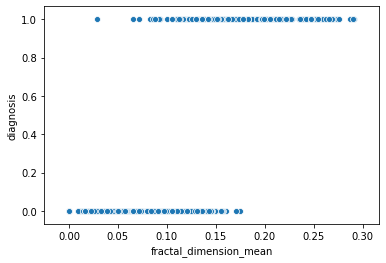

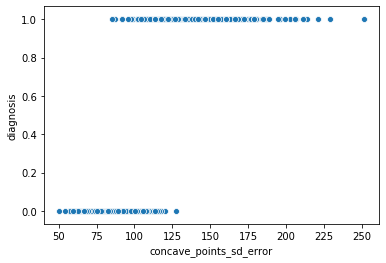

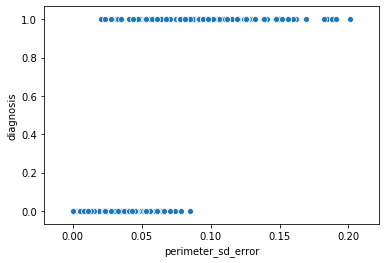

In [7]:
import seaborn as sns
labels=['fractal_dimension_mean','concave_points_sd_error','perimeter_sd_error']
for i in labels:
    ax=sns.scatterplot(d[i],d['diagnosis'])
    ax.set(xlabel=i,ylabel='diagnosis')
    plt.show()

###### Visual representation of the features and diagnosis

Above scatter plot clearly indicating that as the value of feature is increasing there is a clear inclination to diagnosis value to be 1, which is intern representation for Cancer to Malignant.

In [8]:
from sklearn.model_selection import train_test_split
bootstrap_index=bootstrap(standardized_data.index,3000)
standardized_bootstraped_data=pd.DataFrame(columns=col_headers)
j=0
for i in bootstrap_index:
    standardized_bootstraped_data.loc[j]=(d.iloc[i])
    j+=1

y=pd.DataFrame(standardized_bootstraped_data['diagnosis'])
# droping the diagnosis column from the dataframe
standardized_bootstraped_data.drop(['diagnosis'],axis=1,inplace=True)
standardized_bootstraped_data.drop(['ID'],axis=1,inplace=True)

standardized_bootstraped_Malignant_features_data=pd.DataFrame()
standardized_bootstraped_Malignant_features_data['fractal_dimension_mean']=standardized_bootstraped_data['fractal_dimension_mean']
standardized_bootstraped_Malignant_features_data['concave_points_sd_error']=standardized_bootstraped_data['concave_points_sd_error']
standardized_bootstraped_Malignant_features_data['perimeter_sd_error']=standardized_bootstraped_data['perimeter_sd_error']

###### Based on the index values returned by the bootstrap function, standardized_bootstraped_data is constructed. 'diagnosis' and 'ID' columns are dropped. New dataframe standardized_bootstraped_Malignant_features_data is constructed

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(standardized_bootstraped_Malignant_features_data,y,test_size=0.2,random_state=42)

###### spliting of data in Training and Testing

In [10]:
from sklearn.svm import SVC
clf=SVC(gamma='auto')
clf.fit(X_train,y_train)

C:\Users\Karthik\Anaconda31\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###### Here I am using Support Vector Machine algorithm as it very effective in classifing the binary classification. With this model my training data accuracy was about 92 % and test data accuracy was also 91.6%

In [11]:
clf.score(X_train,y_train)

0.92

In [12]:
clf.score(X_test,y_test)

0.945

# Evaluation of the data with second model (Neural Network - Tensorflow)

In [13]:
import tensorflow as tf
import tensorflow.keras as keras

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu',input_shape=[len(X_train.keys())]),
    keras.layers.Dense(64, activation='relu',input_shape=[len(X_train.keys())]),
    keras.layers.Dense(2, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Train on 2400 samples
Epoch 1/15
2400/2400 [==============================] - 1s 415us/sample - loss: 0.9678 - accuracy: 0.5179
Epoch 2/15
2400/2400 [==============================] - 0s 95us/sample - loss: 0.6769 - accuracy: 0.6046
Epoch 3/15
2400/2400 [==============================] - 0s 99us/sample - loss: 0.6188 - accuracy: 0.6775
Epoch 4/15
2400/2400 [==============================] - 0s 108us/sample - loss: 0.5833 - accuracy: 0.7354
Epoch 5/15
2400/2400 [==============================] - 0s 126us/sample - loss: 0.5594 - accuracy: 0.7283
Epoch 6/15
2400/2400 [==============================] - 0s 100us/sample - loss: 0.5281 - accuracy: 0.7583
Epoch 7/15
2400/2400 [==============================] - 0s 84us/sample - loss: 0.5020 - accuracy: 0.7837
Epoch 8/15
2400/2400 [==============================] - 0s 88us/sample - loss: 0.4436 - accuracy: 0.8550
Epoch 9/15
2400/2400 [==============================] - 0s 103us/sample - loss: 0.4021 - accuracy: 0.8863
Epoch 10/15
2400/2400 [=====

#### Using three layers with hidden layer.

In [18]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_loss,test_acc)
model_predict=model.predict([[0.910653,0.668310,0.755467]])
model_predict

600/600 [==============================] - 0s 58us/sample - loss: 0.2159 - accuracy: 0.9400
0.2158737579981486 0.94


array([[0.91989744, 0.08010259]], dtype=float32)

#### Prediction for this input value is accurate, and acheived an accuracy of 94% over test data for chances for malignant Cancer. Actual data also reflect this as Malignant. 

# Comparison between two models:
## SVM: This algo with work good with binary classification, and become complex with multi classification
## Nueral Network: Works fine with multi-classification, consumes lot of hardware resources

# Performance:
## SVM achieved 92% both in training and testing
## Neural Netword achieved 91.46 %

## with the help of correlation coef values considered three features in both the models.

# Part - 2

## Student 1 code

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression #Comment: LinearRegression class should be derived from sklearn.linearmodel
from sklearn.cross_validation import cross_val_score # comment: NO cross_validation class is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection

# Load data
d = pd.read_csv('../data/train.csv')

# Setup data for prediction
x1 = d.SalaryNormalized # it is not data but it is d
x2 = pd.get_dummies(d.ContractType) # it is not data but it is d

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score # comment: NO cross_validation class directly is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection
from sklearn.cross_validation import train_test_split # comment: NO train_test_split directly class is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

## Most of the comments are given inline. 
## Following observation are made:
### 1. No exploratory data analysis is done
### 2. Trying to predict only using one model...which may not be correct
### 3. No model training is carried out
### 4. Model fitting is not done
### 5. Not able to understand why student is finding the scores of Salary and ContractType
### 6. Student not tried to explore categorical data at all...by which be will be leaving out most of the information
### 7. Many compile time errors are there in the code

# It can be judged that student have not got the conceptual clarity on what he has to do analysis because he tring to identify relationship between salary and ContractType. Here ContractType is filled with dummies. So he tring to identifying relationship with dummies

# Student 2 code review 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score # comment: NO cross_validation class is available in sklearn. Rather cross_val_score should be accessed from sklearn.model_selection

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

## Most of the comments are given inline. 
## Following observation are made:
### 1. No exploratory data analysis is done
### 2. Trying to predict only using one model...which may not be correct
### 3. No model training is carried out
### 4. Model fitting is not done
### 5. Not able to understand why student is finding the scores of Salary and ContractType
### 6. Student not tried to explore categorical data at all...by which be will be leaving out most of the information
### 7. compile time errors are there in the code

# It can be judged that student have not got the conceptual clarity on what he has to do analysis because he tring to identify relationship between salary and ContractType. Here ContractType is filled with dummies. So he tring to identifying relationship with dummies